In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
demand = 1000
S = 100
H = 0.3
Q = math.sqrt((2*demand*S)/H)
leadTime = 4
currentInventory =  1000.0
previousInventory =  1001.0
tracker = 99999999
currentIteration = 0
inventoryLevel = []
reorderPoints = []
reorderPoint = 0
belowZero = []

isOrder = False
isZero = False
print (Q)

816.4965809277261


In [55]:
for i in range(5):

    currentIteration = 0
    isOrder = False
    isZero = False
    previousInventory = currentInventory + 1
    
    while (currentInventory < previousInventory):
        randomDemand = 50 + 2 * np.random.randn(1)
        inventoryLevel.append(currentInventory)
        previousInventory = currentInventory
        currentInventory -= randomDemand.item()
        if currentInventory < 0 and not isZero:
            belowZero.append([len(inventoryLevel)-1, previousInventory])
            isZero = True
        if (currentInventory- (leadTime * 50) <= 0) and not isOrder:
            tracker = currentIteration
            reorderPoint = tracker
            reorderPoints.append([len(inventoryLevel), currentInventory])
            isOrder = True

        if (currentIteration == tracker + leadTime):
            currentInventory += Q
            isOrder = False
        currentIteration += 1


In [56]:
Q

816.4965809277261

In [57]:
np.random.randn(1)

array([-0.5739341])

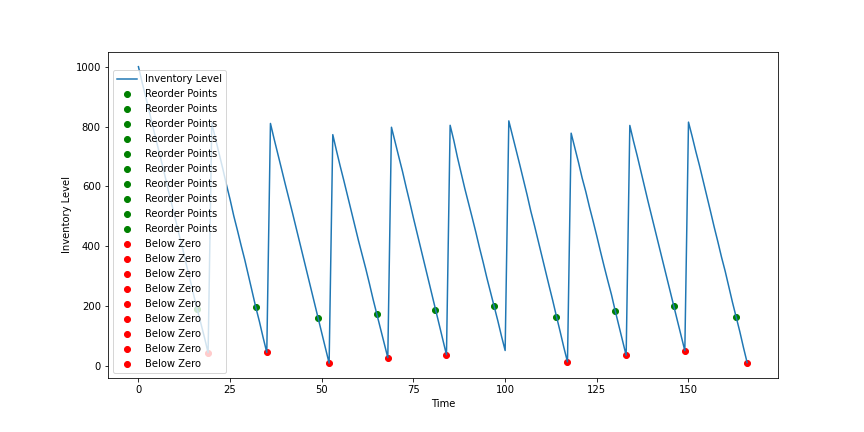

In [58]:
%matplotlib inline
%matplotlib widget
plt.close('all')
num = "EOQ trial"
fig,ax = plt.subplots(num=num, figsize = (12,6))
ax.plot(inventoryLevel, label ="Inventory Level")
# ax.axvline(reorderPoint, color ="C0", label = "Reorder Point")
for x, y in reorderPoints:
    ax.scatter(x,y, marker = "o", color = "green", label = "Reorder Points")
for x,y in belowZero:
    ax.scatter(x, y, marker = "o", color = "red", label = "Below Zero")
#ax.plot(reorderPoints, marker = "o", color = "green")
# ax.plot(reorderPoint,'ro') 
#ax.axhline(belowZero, color = "red", label = "Below Zero")
ax.set(xlabel = "Time", ylabel = "Inventory Level")
ax.legend();

In [6]:
# We would want a vline when the order is realised.
# Run to get 5/6 saw teeth
# reset all variables in i loop
print(reorderPoints)

[17, 33, 49, 66, 82]


In [63]:
reorderPoints[0][0]

16

[16, 190.58988076100144]